In [0]:
! pip install --upgrade Cython
! pip install --upgrade git+https://github.com/statsmodels/statsmodels


Requirement already up-to-date: Cython in /usr/local/lib/python3.6/dist-packages (0.29.10)
  Cloning https://github.com/statsmodels/statsmodels to /tmp/pip-req-build-85nyv6t3
  Running command git clone -q https://github.com/statsmodels/statsmodels /tmp/pip-req-build-85nyv6t3
  Stored in directory: /tmp/pip-ephem-wheel-cache-qabgv5rj/wheels/7d/ad/45/ac1a03bd759c2fa74c486e2b1950d94b55f511b4c2b0418bd5
Successfully built statsmodels
  Found existing installation: statsmodels 0.9.0
    Uninstalling statsmodels-0.9.0:
      Successfully uninstalled statsmodels-0.9.0


In [0]:
import statsmodels.api as sm

In [0]:
!pip install PyDrive

     |████████████████████████████████| 993kB 4.9MB/s 
  Stored in directory: /root/.cache/pip/wheels/fa/d2/9a/d3b6b506c2da98289e5d417215ce34b696db856643bad779f4
Successfully built PyDrive


In [0]:
import os 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import datetime

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
download = drive.CreateFile({'id': '1lGtCEM-xnHGdjam4JKgzEzgHtXjWQB_1'})
download.GetContentFile('Data.zip')


In [0]:
!unzip Data.zip

Archive:  Data.zip
  inflating: ECE219_tweet_data/tweets_#gohawks.txt  
  inflating: ECE219_tweet_data/tweets_#gopatriots.txt  
  inflating: ECE219_tweet_data/tweets_#nfl.txt  
  inflating: ECE219_tweet_data/tweets_#patriots.txt  
  inflating: ECE219_tweet_data/tweets_#sb49.txt  
  inflating: ECE219_tweet_data/tweets_#superbowl.txt  


In [0]:
import pandas as pd
import json


In [3]:
Total_tweet=0
tweet_time=[]
follow_count=[]
retweet_count=[]

status_count=[]
hashtag_count=[]
friends_count=[]
mentions_TF=[]
favourites_count=[]
url_ratio_count=[]


with open('./ECE219_tweet_data/tweets_#nfl.txt','r') as f:
#   read_data= f.read()
  for line in f:
    json_object=json.loads(line)
    Total_tweet += 1
    follow_count.append(json_object['author']['followers'])
    datetime_object = json_object['citation_date']
    retweet_count.append(json_object['metrics']['citations']['total'])
    tweet_time.append(datetime_object)
    
    ### new features:
    status_count.append(json_object['tweet']['user']['statuses_count'])
    hashtag_count.append(len(json_object['tweet']['entities']['hashtags']))
    friends_count.append(json_object['tweet']['user']['friends_count'])

    if not json_object['tweet']['entities']['user_mentions'] :
      mentions_TF.append(0)
    else:
      mentions_TF.append(1)

    url_ratio_count.append(len(json_object['tweet']['entities']['urls']))
    favourites_count.append(json_object['tweet']['user']['favourites_count'])
    

f.closed

True

In [4]:
print(len(status_count))
print(len(retweet_count))
print(len(friends_count))
# print(len(mentions_count))


print((status_count[0:100]))
print(hashtag_count[0:100])
print(friends_count[0:100])
print(mentions_TF[0:100])
print(favourites_count[0:100])

print(url_ratio_count[0:100])
print(len(url_ratio_count))


233022
233022
233022
[5, 283, 1641, 69, 100951, 100953, 7808, 147583, 24920, 2220, 58021, 98, 955, 6297, 48546, 8396, 5039, 29433, 14665, 14667, 21471, 2399, 2241, 264, 131132, 131133, 131134, 25209, 12485, 42419, 131606, 1940, 25267, 131768, 19203, 1667, 15835, 12518, 1127, 48324, 79229, 79461, 19441, 132005, 192100, 69933, 71483, 50930, 75744, 89384, 306851, 40080, 40084, 3845, 144179, 69940, 132007, 7412, 50932, 7959, 79231, 12758, 12759, 39494, 53136, 39495, 50933, 4335, 91197, 89386, 57200, 166873, 9910, 12567, 79234, 192105, 4981, 10091, 306857, 12761, 356, 1365, 50937, 40087, 40085, 40086, 79236, 166874, 12762, 75753, 50938, 662352, 75756, 12765, 54448, 50940, 79238, 61249, 484, 4449]
[10, 7, 3, 5, 9, 7, 4, 6, 3, 4, 7, 4, 2, 7, 5, 2, 3, 3, 3, 4, 3, 3, 4, 8, 2, 2, 2, 2, 3, 2, 2, 3, 3, 2, 2, 6, 3, 3, 6, 2, 4, 2, 1, 2, 3, 9, 4, 5, 5, 4, 3, 1, 1, 2, 4, 6, 2, 3, 4, 2, 4, 5, 5, 5, 4, 5, 5, 2, 4, 4, 4, 2, 1, 1, 4, 3, 2, 3, 3, 4, 3, 3, 4, 1, 1, 1, 4, 2, 5, 5, 5, 3, 5, 4, 2, 4, 4, 1, 2, 

In [5]:
import pytz
import numpy as np
from datetime import timedelta



sortTime= np.sort(tweet_time, axis=0)


mint=datetime.datetime.fromtimestamp(sortTime[0])
maxt=datetime.datetime.fromtimestamp(sortTime[-1])
timerange=maxt-mint
print("True range in hour: ",timerange.total_seconds()/(60*60))
total_time_range= timerange.total_seconds()/(60*60)
print("Average number of tweets per hour", len(tweet_time)/total_time_range)







pst_tz = pytz.timezone('America/Los_Angeles')

min_tweet_time= np.min(tweet_time)



minute_of_min= datetime.datetime.fromtimestamp(min_tweet_time, pst_tz).minute
second_of_min= datetime.datetime.fromtimestamp(min_tweet_time, pst_tz).second

timeD=timedelta(hours=0, minutes=minute_of_min,seconds= second_of_min)
# print(timedelta(hours=0, minutes=minute_of_min,seconds= second_of_min))
# print(datetime.datetime.fromtimestamp(min_tweet_time, pst_tz)-timeD)

min_time_conv=datetime.datetime.fromtimestamp(min_tweet_time, pst_tz)-timeD
# print(min_time_conv)

tweet_window=[]
for element in tweet_time:
  element_conv= datetime.datetime.fromtimestamp(element, pst_tz)
  
  bin_index=(element_conv-min_time_conv).total_seconds()/(60*60)
#   print(element_conv,datetime.datetime.fromtimestamp(sortTime[0]))
#   print(int(bin_index))
  tweet_window.append(int(bin_index))
  
  
# print(np.max(tweet_window))
# print((tweet_window))
# np.where(np.asarray(tweet_window,dtype=int)==0)
retweet_array_window=[]
for i in range(np.max(tweet_window)+1):
#   print(np.where(np.asarray(tweet_window,dtype=int)==i))
  retweet_array_window.append(np.where(np.asarray(tweet_window,dtype=int)==i))
#   break

True range in hour:  586.9255555555555
Average number of tweets per hour 397.0213901819841


In [0]:
# import matplotlib.pyplot as plt
# plt.hist(tweet_window, bins=int(np.max(tweet_time))+1)

# import matplotlib.pyplot as plt

# plt.figure()
# plt.hist(tweet_window, bins=int(np.max(tweet_time))+1)
# plt.show()

In [7]:
# print(retweet_array_window[0][0][0])
# print(retweet_array_window)
my_retweet_count=[]
my_follow_count=[]
my_max_follower_count=[]
my_time_of_day=[]

my_status_count=[] #get how many status in certain hour
my_hashtag_count=[] #get how many hashtags in certain hour
my_friends_count=[] #max friend count
my_mentions_TF=[] #
my_favourites_count=[]
num_tweet=[]
for element in retweet_array_window:
  for innerelement in element:
#     print(innerelement)[]
    item=0
    item1=0
    maxitem2=0
    timeitem=0
    
    item_status=0
    item_hashtag=0
    item_friends=0
    item_mentions=0
    item_favourites=0
    item_tweet=0
    for indexlayer in innerelement:
      
      item_tweet+=1
      item=retweet_count[indexlayer]+item
      item1=follow_count[indexlayer]+item1
      timeitem=datetime.datetime.fromtimestamp(tweet_time[indexlayer], pst_tz).hour
      
      item_status= status_count[indexlayer]+ item_status
      item_hashtag=hashtag_count[indexlayer]+ item_hashtag
      item_friends=item_friends+ friends_count[indexlayer]
      item_mentions=item_mentions+ mentions_TF[indexlayer]
      item_favourites=item_favourites+ favourites_count[indexlayer]
      
      
      
      
      if maxitem2 < follow_count[indexlayer]:
        maxitem2= follow_count[indexlayer]
    my_time_of_day.append(timeitem)   
    my_max_follower_count.append(maxitem2)  
    my_retweet_count.append(item)
    my_follow_count.append(item1)
    
    my_status_count.append(item_status)
    my_hashtag_count.append(item_hashtag)
    my_friends_count.append(item_friends)
    my_mentions_TF.append(item_mentions)
    my_favourites_count.append(item_favourites)
    num_tweet.append(item_tweet)

n_tweet= np.histogram(tweet_window,bins=int(np.max(tweet_window))+1)
print(len(n_tweet[0]))            
print(len(my_retweet_count))
print(len(my_follow_count))
print(len(my_max_follower_count))
print(len(my_time_of_day))

df = pd.DataFrame({
    '# of Tweets' :num_tweet,
    '# of retweets' : my_retweet_count,
    'Sum n followers': my_follow_count,
    'Max followers': my_max_follower_count,
    'Mentions': my_mentions_TF,
    'Status': my_status_count,
    'Hashtags': my_hashtag_count,
    'Friends': my_friends_count,
    'Favourites': my_favourites_count,
    'Time of day': my_time_of_day
    }, columns = ['# of Tweets', 
                  '# of retweets', 
                  'Sum n followers', 
                  'Max followers', 
                  'Mentions',
                  'Status', 
                  'Hashtags', 
                  'Friends', 
                  'Favourites',
                  'Time of day'])
# x=[n_tweet[0], my_retweet_count, my_follow_count, my_max_follower_count, my_status_count,my_hashtag_count]

587
587
587
587
587


In [8]:
df.head()

,# of Tweets,# of retweets,Sum n followers,Max followers,Mentions,Status,Hashtags,Friends,Favourites,Time of day
0,55,62,96256.0,10658.0,1,4352102,185,64729,13206,0
1,51,56,87168.0,12225.0,4,2811522,150,44886,895,1
2,54,94,100225.0,10658.0,8,3734082,195,84244,17777,2
3,60,125,85903.0,12225.0,7,2865042,200,59679,20611,3
4,57,184,113695.0,14979.0,5,3584102,194,86198,16203,4


In [11]:


from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
input_arr = []
for index in df.index:
    input_arr.append(df.loc[index, '# of Tweets':'Time of day'].values)
input_arr.pop()#delete last row
input_arr = sm.add_constant(input_arr)
# print(input_arr)
output_arr = df.loc[df.index[1]:, '# of Tweets'].values #from second row to last row
# print(output_arr)

# input_arr, input_arr, output_arr, output_arr = train_test_split(input_arr, output_arr, test_size=0.1, random_state=42,shuffle=False)

model = sm.OLS(output_arr, input_arr)
results = model.fit()
output_predicted = results.predict(input_arr)
def rmse(predictions, targets):
    return ((predictions - targets) ** 2).mean()

res = model.fit()

print(res.summary())
print('#'*50)

print("MSE= ", (rmse(output_predicted, output_arr)))
print("RMSE= ", np.sqrt(rmse(output_predicted, output_arr)))
print('#'*50)
print("T-values:")
for i in range(len(res.tvalues)):
  print('column',i+1,res.tvalues[i])
print('#'*50)
print("P-Values: ")
for i in range(len(res.pvalues)):
  print('column',i+1,res.pvalues[i])
print('#'*50)


# fig = plt.figure(figsize=(16,11))
# fig = sm.graphics.plot_partregress_grid(results, fig=fig)
# fig.show()
# # plot fitted values vs true values
# plt.figure(figsize=(16,11))
# plt.scatter(output_arr, output_predicted, color='red', edgecolors='b')
# plt.plot([output_arr.min(), output_arr.max()], [output_arr.min(), output_arr.max()], lw=4)
# plt.ylabel('Fitted Number of Tweets in Next Hour', fontsize = 16)
# plt.xlabel('True Number of Tweets in Next Hour', fontsize = 16)
# plt.title('Fitted Values vs True Values', fontsize = 16)
# plt.show()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     141.1
Date:                Sun, 09 Jun 2019   Prob (F-statistic):          1.21e-147
Time:                        20:03:58   Log-Likelihood:                -4380.4
No. Observations:                 586   AIC:                             8783.
Df Residuals:                     575   BIC:                             8831.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4486     39.185     -0.011      0.9

In [0]:
df = pd.DataFrame({
    '# of Tweets' : n_tweet[0],
#     '# of retweets' : my_retweet_count,
#     'Sum n followers': my_follow_count,
#     'Max followers': my_max_follower_count,
#     'Mentions': my_mentions_TF,
    'Status': my_status_count,
    'Hashtags': my_hashtag_count,
#     'Friends': my_friends_count,
#     'Favourites': my_favourites_count,
#     'Time of day': my_time_of_day
    }, columns = ['# of Tweets', 
#                   '# of retweets', 
#                   'Sum n followers', 
#                   'Max followers', 
#                   'Mentions',
                  'Status', 
                  'Hashtags', 
#                   'Friends', 
#                   'Favourites',
#                   'Time of day'
                 ])

PREDICTION [291.22466882 234.5876543  185.67690597 250.79571852 210.14754403
 301.28303625 383.48932979 434.14484475 480.50967538 555.2658658
 537.87741695 569.80117665 635.35322454 574.98278977 697.64825794
 604.20536828 518.83944055 486.51123572 510.27185508 487.41219797
 313.7505109  334.37343363 375.33557335 315.34855614 137.93062378
 221.60835075 243.58739986 274.65317103 261.03682943 329.97748968
 288.51213758 486.50933976 594.10412956 689.09213117 706.46727279
 802.90550681 977.25573195 992.33626272 733.29119382 834.30491711
 600.66016925 564.22509918 602.61890571 560.87215236 476.10945367
 485.63507744 481.55578826 333.91559695 236.04371509  29.69619656
  29.16590849  30.01694395  29.16590849  28.77022659  29.04620633
  29.16590849  29.22693546  30.53513036  29.16590849]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.871
Model:                            OLS   Adj. R-squar

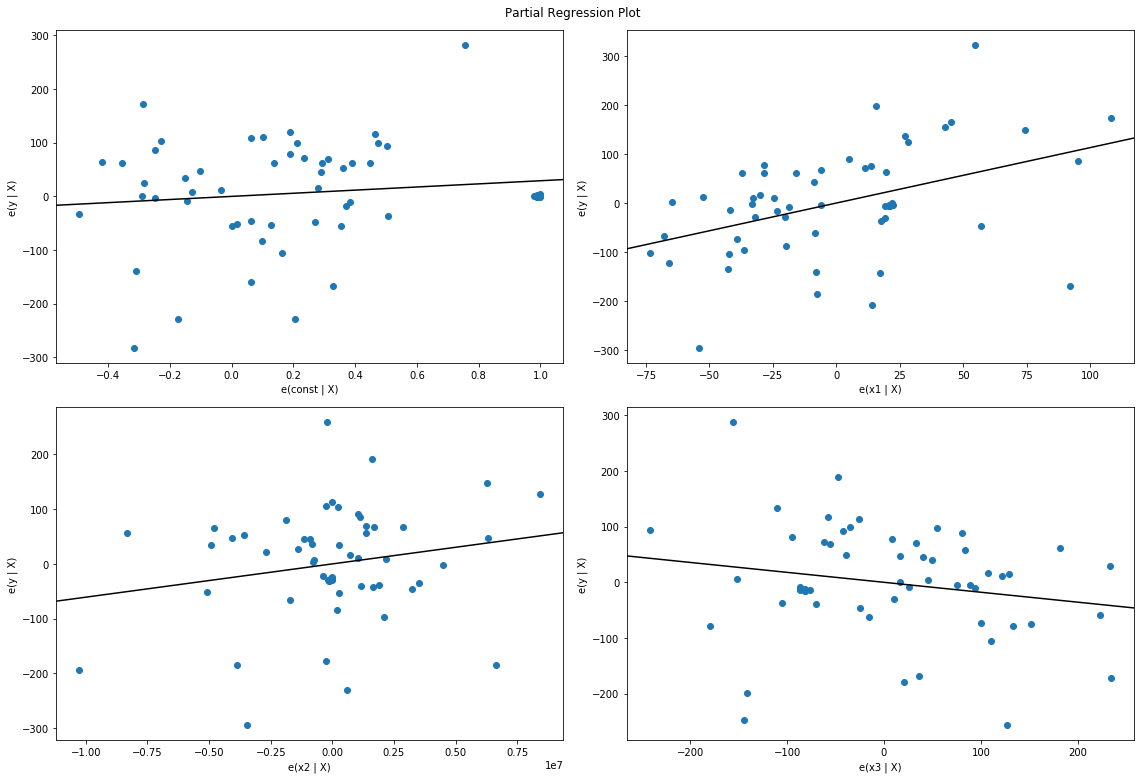

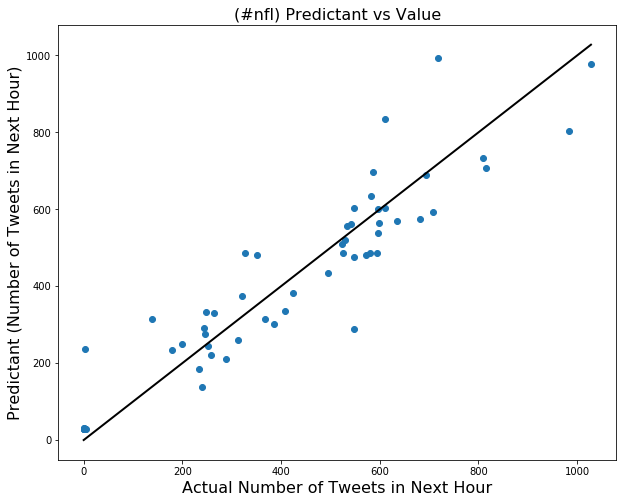

4

In [16]:

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
input_arr = []
for index in df.index:
    input_arr.append(df.loc[index, '# of Tweets':'Hashtags'].values)
input_arr.pop()#delete last row
input_arr = sm.add_constant(input_arr)
# print(input_arr)
output_arr = df.loc[df.index[1]:, '# of Tweets'].values #from second row to last row
# print(output_arr)

input_arr, input_arr, output_arr, output_arr = train_test_split(input_arr, output_arr, test_size=0.1, random_state=42,shuffle=False)

model = sm.OLS(output_arr, input_arr)
results = model.fit()
output_predicted = results.predict(input_arr)
def rmse(predictions, targets):
    return ((predictions - targets) ** 2).mean()

res = model.fit()
print("PREDICTION",output_predicted)
print(res.summary())
print('#'*50)

print("MSE= ", (rmse(output_predicted, output_arr)))
print("RMSE= ", np.sqrt(rmse(output_predicted, output_arr)))
print('#'*50)
print("T-values:")
for i in range(len(res.tvalues)):
  print('column',i+1,res.tvalues[i])
print('#'*50)
print("P-Values: ")
for i in range(len(res.pvalues)):
  print('column',i+1,res.pvalues[i])
print('#'*50)


fig = plt.figure(figsize=(16,11))
fig = sm.graphics.plot_partregress_grid(results, fig=fig)
fig.show()
# plot fitted values vs true values
plt.figure(figsize=(10,8))
plt.scatter(output_arr, output_predicted)
plt.plot([output_arr.min(), output_arr.max()], [output_arr.min(), output_arr.max()], lw=2, color='black')
plt.ylabel('Predictant (Number of Tweets in Next Hour)', fontsize = 16)
plt.xlabel('Actual Number of Tweets in Next Hour', fontsize = 16)
plt.title('(#nfl) Predictant vs Value', fontsize = 16)
plt.show()
len(res.pvalues)

In [14]:
res.pvalues

array([0.26814939, 0.00084946, 0.13811805, 0.14547166])

In [0]:
# x1            -5.9692      0.679     -8.788      0.000      -7.303      -4.635
# x2            -0.6214      0.069     -8.998      0.000      -0.757      -0.486
# x3           5.25e-06   2.51e-05      0.209      0.835   -4.41e-05    5.46e-05
# x4         -3.624e-05      0.000     -0.309      0.758      -0.000       0.000
# x5          8.659e-05   4.64e-05      1.865      0.063   -4.58e-06       0.000
# x6             1.8496      0.253      7.313      0.000       1.353       2.346
# x7            -0.0038      0.001     -6.034      0.000      -0.005      -0.003
# x8            19.3173      2.130      9.069      0.000      15.134      23.501
# x9             0.0019      0.000      6.082      0.000       0.001       0.003
# x10          -22.1796     32.664     -0.679      0.497     -86.335      41.975